In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Đọc dữ liệu
df = pd.read_csv("MSFT_prices_2013_present.csv", parse_dates=["date"])
# Đảm bảo cột 'close' là dạng số
df["close"] = pd.to_numeric(df["close"], errors="coerce")

# Loại bỏ giá trị NaN nếu có
df.dropna(inplace=True)

df.set_index("date", inplace=True)

# Hiển thị vài dòng đầu
print(df.head())


                close
date                 
2013-01-02  22.284510
2013-01-03  21.985983
2013-01-04  21.574507
2013-01-07  21.534164
2013-01-08  21.421209


# Plot biểu đồ giá đóng cửa

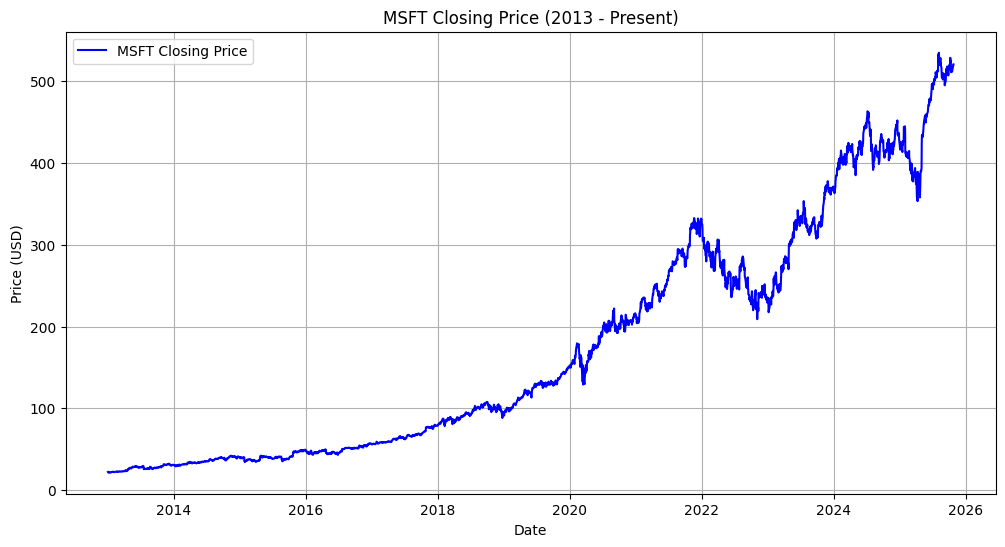

In [2]:
plt.figure(figsize=(12,6))
plt.plot(df["close"], label="MSFT Closing Price", color="blue")
plt.title("MSFT Closing Price (2013 - Present)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


# Kiểm tra tính dừng của dữ liệu

In [3]:
result = adfuller(df["close"].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("Dữ liệu có tính dừng (Stationary)")
else:
    print("Dữ liệu không dừng (Non-stationary)")


ADF Statistic: 1.228881854705746
p-value: 0.9961794792869353
Dữ liệu không dừng (Non-stationary)


# Dùng sai phân bậc 1

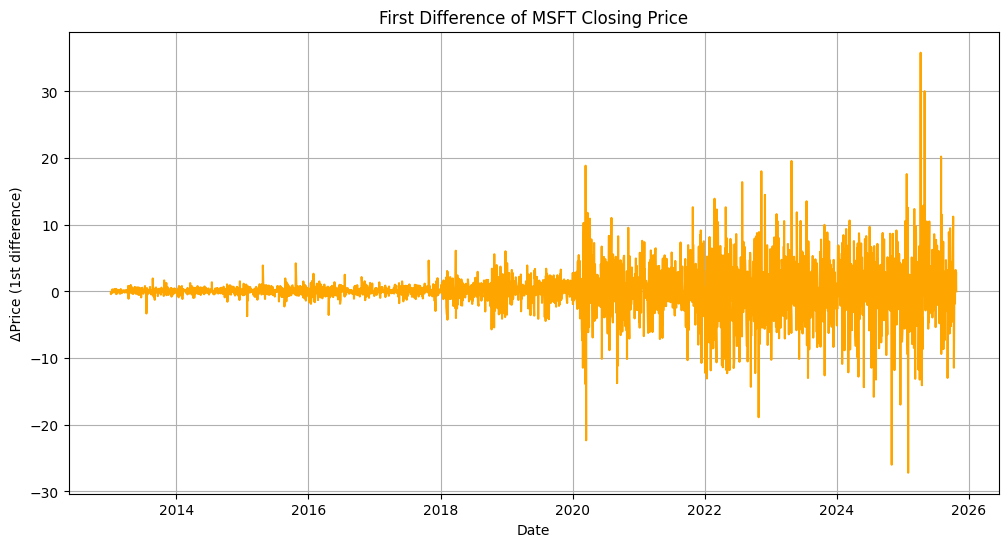

ADF Statistic (Diff 1): -18.56333182690881
p-value (Diff 1): 2.0862727653849246e-30
 Dữ liệu dừng sau khi lấy sai phân bậc 1


In [4]:
df["diff_1"] = df["close"].diff().dropna()

plt.figure(figsize=(12,6))
plt.plot(df["diff_1"], color="orange")
plt.title("First Difference of MSFT Closing Price")
plt.xlabel("Date")
plt.ylabel("ΔPrice (1st difference)")
plt.grid(True)
plt.show()

# Kiểm định ADF sau sai phân
result_diff1 = adfuller(df["diff_1"].dropna())
print("ADF Statistic (Diff 1):", result_diff1[0])
print("p-value (Diff 1):", result_diff1[1])

if result_diff1[1] < 0.05:
    print(" Dữ liệu dừng sau khi lấy sai phân bậc 1")
else:
    print("️ Dữ liệu vẫn chưa dừng, thử sai phân bậc 2")


# Dùng sai phân bậc 2

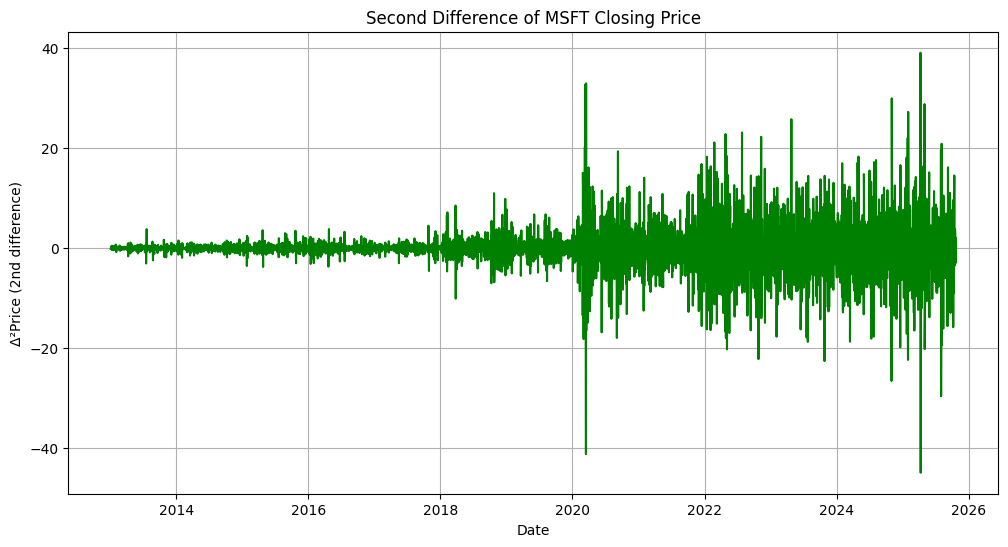

ADF Statistic (Diff 2): -18.61461927576323
p-value (Diff 2): 2.063734275680598e-30
 Dữ liệu dừng sau khi lấy sai phân bậc 2


In [5]:
df["diff_2"] = df["diff_1"].diff().dropna()

plt.figure(figsize=(12,6))
plt.plot(df["diff_2"], color="green")
plt.title("Second Difference of MSFT Closing Price")
plt.xlabel("Date")
plt.ylabel("Δ²Price (2nd difference)")
plt.grid(True)
plt.show()

# Kiểm định ADF sau sai phân bậc 2
result_diff2 = adfuller(df["diff_2"].dropna())
print("ADF Statistic (Diff 2):", result_diff2[0])
print("p-value (Diff 2):", result_diff2[1])

if result_diff2[1] < 0.05:
    print(" Dữ liệu dừng sau khi lấy sai phân bậc 2")
else:
    print(" Dữ liệu vẫn chưa dừng")


# Xác định AR(p) và MA(q)

In [6]:
# Tạo log-return (tỷ suất sinh lợi liên tục)
df["log_return"] = np.log(df["close"] / df["close"].shift(1))
df.dropna(inplace=True)

# Kiểm định tính dừng
result = adfuller(df["log_return"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -20.033700948006032
p-value: 0.0


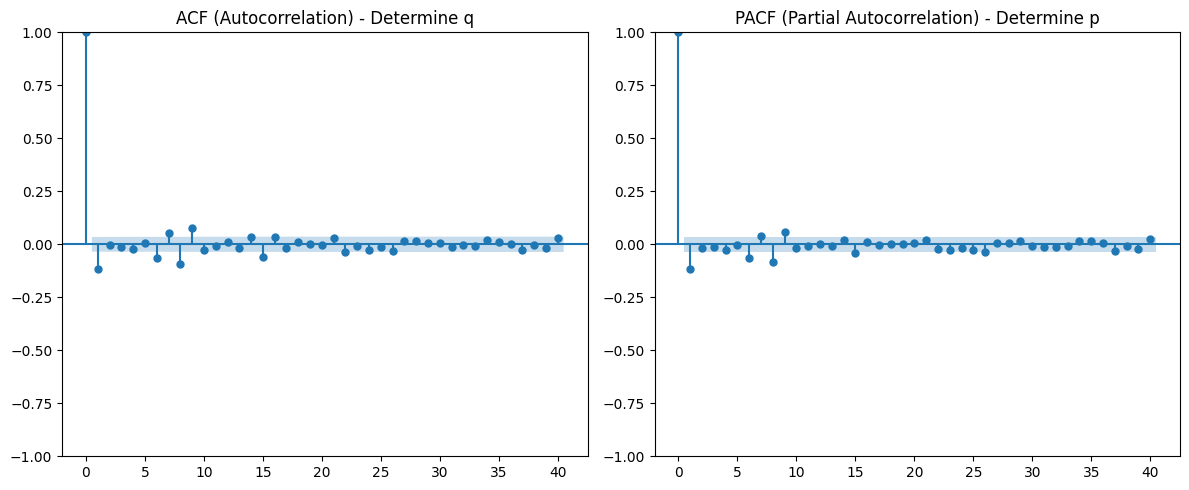

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(df["log_return"], lags=40, ax=plt.gca())
plt.title("ACF (Autocorrelation) - Determine q")

plt.subplot(1,2,2)
plot_pacf(df["log_return"], lags=40, ax=plt.gca(), method='ywm')
plt.title("PACF (Partial Autocorrelation) - Determine p")

plt.tight_layout()
plt.show()


# Dự báo mô hình với p d q

In [8]:
train_size = int(len(df) * 0.9)
train, test = df["log_return"][:train_size], df["log_return"][train_size:]
print(f"Train size: {len(train)}, Test size: {len(test)}")


Train size: 2898, Test size: 323


In [9]:
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 1, 0, 1  # ví dụ, bạn thay bằng giá trị đã xác định

# Huấn luyện mô hình
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())


/Users/phuchoang/Local_Document/data-analytics/basic-data-analytics-in-business-university/lab-5/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/phuchoang/Local_Document/data-analytics/basic-data-analytics-in-business-university/lab-5/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/phuchoang/Local_Document/data-analytics/basic-data-analytics-in-business-university/lab-5/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._i

                               SARIMAX Results                                
Dep. Variable:             log_return   No. Observations:                 2898
Model:                 ARIMA(1, 0, 1)   Log Likelihood                7765.811
Date:                Fri, 24 Oct 2025   AIC                         -15523.623
Time:                        23:20:15   BIC                         -15499.736
Sample:                             0   HQIC                        -15515.016
                               - 2898                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.000      3.770      0.000       0.000       0.002
ar.L1          0.0708      0.083      0.854      0.393      -0.092       0.233
ma.L1         -0.1993      0.085     -2.341      0.0

/Users/phuchoang/Local_Document/data-analytics/basic-data-analytics-in-business-university/lab-5/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/phuchoang/Local_Document/data-analytics/basic-data-analytics-in-business-university/lab-5/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


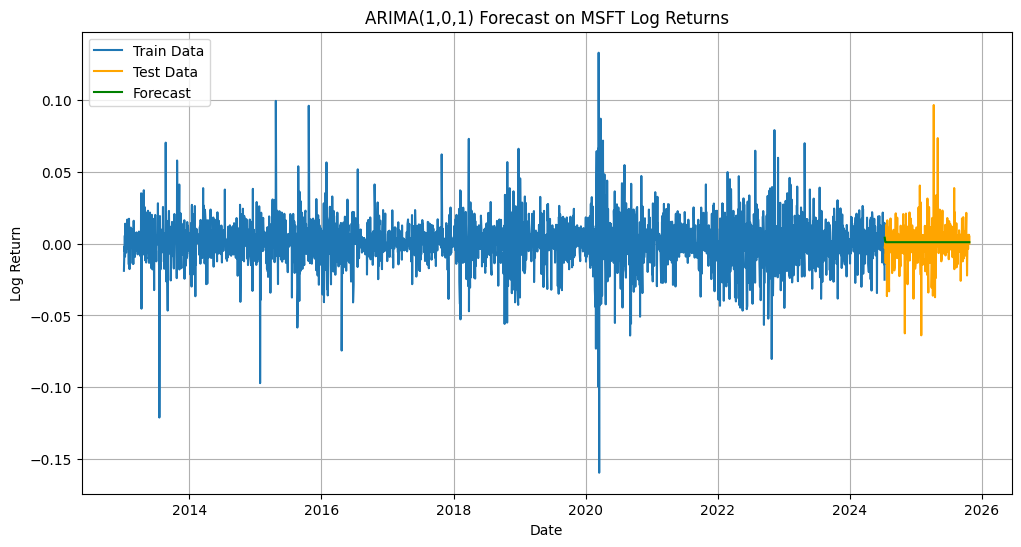

In [10]:
# Dự báo cho phần test
forecast = model_fit.forecast(steps=len(test))

# Vẽ so sánh
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train Data")
plt.plot(test.index, test, label="Test Data", color='orange')
plt.plot(test.index, forecast, label="Forecast", color='green')
plt.title(f"ARIMA({p},{d},{q}) Forecast on MSFT Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, forecast)
print("Mean Squared Error (MSE):", mse)
print("Root MSE:", np.sqrt(mse))


Mean Squared Error (MSE): 0.0002166167998722139
Root MSE: 0.01471790745562065


In [12]:
from sklearn.metrics import mean_absolute_error
# MSE và RMSE
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(test, forecast)

# MAPE (chỉ khi test không chứa giá trị 0)
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("Evaluation Metrics:")
print(f"MAE  = {mae:.6f}")
print(f"MSE  = {mse:.6f}")
print(f"RMSE = {rmse:.6f}")
print(f"MAPE = {mape:.3f}%")


Evaluation Metrics:
MAE  = 0.009815
MSE  = 0.000217
RMSE = 0.014718
MAPE = nan%


/var/folders/5z/yslry4896h775tdtwm9wbfq40000gn/T/ipykernel_18699/1863643512.py:10: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test - forecast) / test)) * 100


# Xác định mô hình tốt nhất ARIMA (p,d,q) bằng auto arima (chọn lựa qua tieu chí về chỉ số AIC và BIC) và so sánh với kết quả cũ

/Users/phuchoang/Local_Document/data-analytics/basic-data-analytics-in-business-university/lab-5/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/phuchoang/Local_Document/data-analytics/basic-data-analytics-in-business-university/lab-5/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/phuchoang/Local_Document/data-analytics/basic-data-analytics-in-business-university/lab-5/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._i

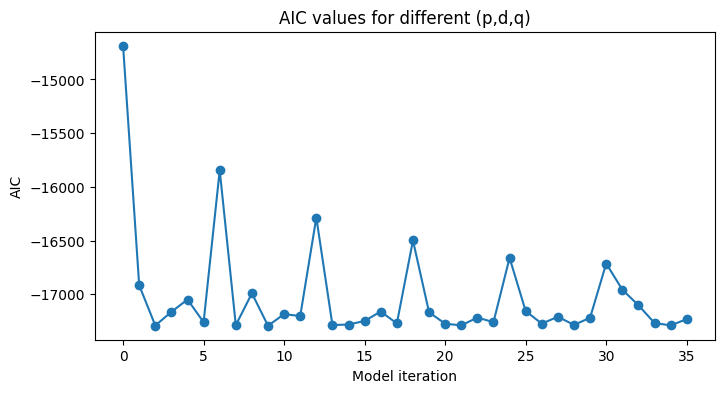


Best model: ARIMA(1, 1, 3) with AIC=-17292.787297447358


In [13]:
import pmdarima as pm
import matplotlib.pyplot as plt

series = df["log_return"].dropna()

aic_values = []
orders = []

for p in range(0, 6):
    for q in range(0, 6):
        try:
            model = pm.ARIMA(order=(p, 1, q)).fit(series)
            aic_values.append(model.aic())
            orders.append((p, 1, q))
        except:
            continue

# Vẽ biểu đồ AIC
plt.figure(figsize=(8,4))
plt.plot(aic_values, marker='o')
plt.title("AIC values for different (p,d,q)")
plt.xlabel("Model iteration")
plt.ylabel("AIC")
plt.show()

best_idx = aic_values.index(min(aic_values))
print(f"\nBest model: ARIMA{orders[best_idx]} with AIC={aic_values[best_idx]}")
